In [2]:
# Importing Various Libraries, Classifiers and Metrics
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [12]:
# Load the dataset
bank_data = pd.read_csv('/content/bank-additional-full.csv', sep=';')

In [16]:
pd.DataFrame(bank_data)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
# List all types of data
print("\nData Types:")
print(bank_data.dtypes)


Data Types:
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [10]:
# Check for missing values
missing_values = bank_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [18]:
# Prepare the data
label_encoder = LabelEncoder()
scaler = StandardScaler()

In [19]:
# Convert categorical variables to numerical
categorical_cols = bank_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    bank_data[col] = label_encoder.fit_transform(bank_data[col])

In [20]:
# List all types of data
print("\nData Types:")
print(bank_data.dtypes)


Data Types:
age                 int64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object


In [6]:
# Split the data into features and target
X = bank_data.drop('y', axis=1)
y = bank_data['y']

In [11]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
# Initialize the Logistic Regression classifier with modified parameters
classifiers["Logistic Regression"] = LogisticRegression(max_iter=1000, solver='saga')


In [8]:
# Initialize the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost Algorithm": XGBClassifier()
}

Results for Logistic Regression:
Accuracy: 0.9101723719349356
Precision: 0.6643109540636042
Recall: 0.4060475161987041
F1 Score: 0.5040214477211796


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10968
           1       0.66      0.41      0.50      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



Confusion Matrix for Logistic Regression:
[[10683   285]
 [  825   564]]




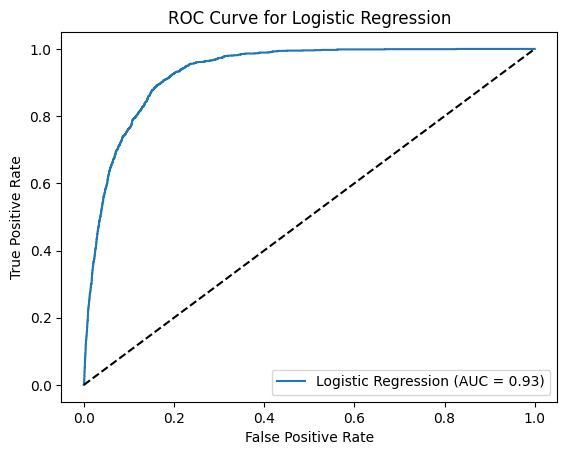

Results for Naive Bayes:
Accuracy: 0.8501254349761269
Precision: 0.3930715935334873
Recall: 0.6126709863210943
F1 Score: 0.47889701744513224


Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     10968
           1       0.39      0.61      0.48      1389

    accuracy                           0.85     12357
   macro avg       0.67      0.75      0.70     12357
weighted avg       0.88      0.85      0.86     12357



Confusion Matrix for Naive Bayes:
[[9654 1314]
 [ 538  851]]


Results for K-Nearest Neighbors:
Accuracy: 0.9019988670389253
Precision: 0.5956989247311828
Recall: 0.3988480921526278
F1 Score: 0.47779215178956447


Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10968
           1       0.60      0.40      0.48      1389

    accuracy                           0.90     12357
   macro a

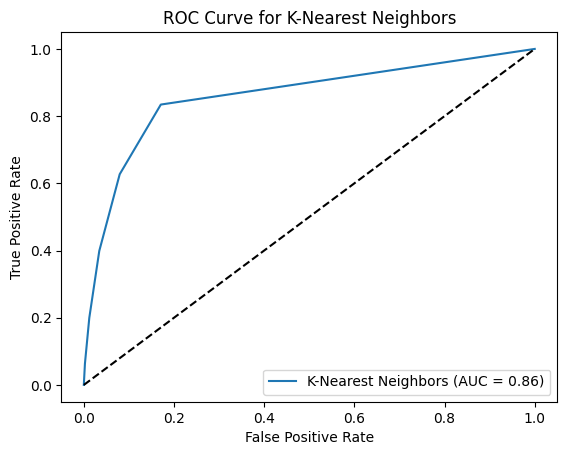

Results for Decision Tree:
Accuracy: 0.8900218499635834
Precision: 0.5106534090909091
Recall: 0.5176385889128869
F1 Score: 0.5141222738648553


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10968
           1       0.51      0.52      0.51      1389

    accuracy                           0.89     12357
   macro avg       0.72      0.73      0.73     12357
weighted avg       0.89      0.89      0.89     12357



Confusion Matrix for Decision Tree:
[[10279   689]
 [  670   719]]




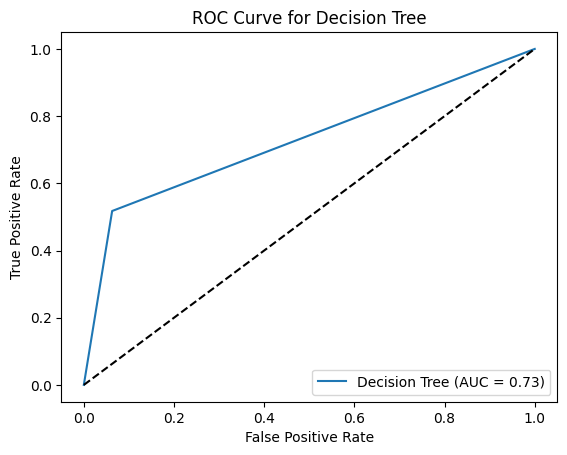

Results for Random Forest:
Accuracy: 0.9150279193979121
Precision: 0.6550777676120768
Recall: 0.515478761699064
F1 Score: 0.5769540692989524


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10968
           1       0.66      0.52      0.58      1389

    accuracy                           0.92     12357
   macro avg       0.80      0.74      0.76     12357
weighted avg       0.91      0.92      0.91     12357



Confusion Matrix for Random Forest:
[[10591   377]
 [  673   716]]




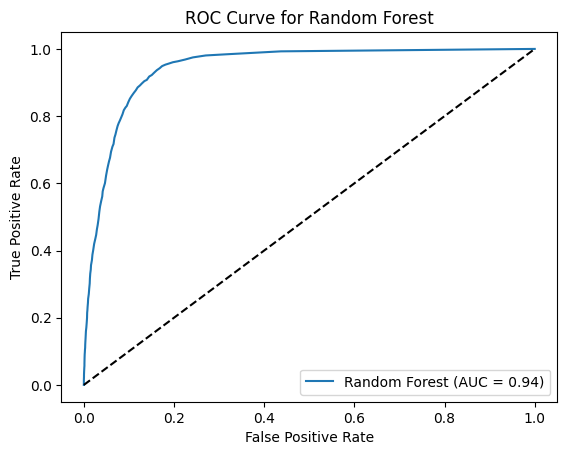

Results for XGBoost Algorithm:
Accuracy: 0.9138949583232177
Precision: 0.638533674339301
Recall: 0.5392368610511159
F1 Score: 0.5846994535519126


Classification Report for XGBoost Algorithm:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10968
           1       0.64      0.54      0.58      1389

    accuracy                           0.91     12357
   macro avg       0.79      0.75      0.77     12357
weighted avg       0.91      0.91      0.91     12357



Confusion Matrix for XGBoost Algorithm:
[[10544   424]
 [  640   749]]




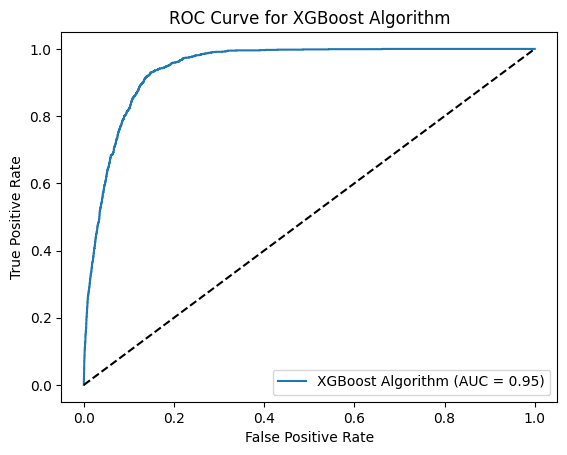

In [20]:
# Train and evaluate the classifiers
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

    # Print results
    print(f"Results for {name}:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("\n")

    # Generate classification report
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print("\n")

    # Generate confusion matrix
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

    # Generate ROC curve and AUC
    if name != "Naive Bayes":  # Naive Bayes doesn't support predict_proba
        y_prob = clf.predict_proba(X_test_scaled)[:, 1]
        auc = roc_auc_score(y_test, y_prob)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure()
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {name}')
        plt.legend(loc='lower right')
        plt.show()


In [21]:
# Display the results
results_df = pd.DataFrame(results).T
print("\nResults Summary:")
print(results_df)


Results Summary:
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.910172   0.664311  0.406048  0.504021
Naive Bayes          0.850125   0.393072  0.612671  0.478897
K-Nearest Neighbors  0.901999   0.595699  0.398848  0.477792
Decision Tree        0.890022   0.510653  0.517639  0.514122
Random Forest        0.915028   0.655078  0.515479  0.576954
XGBoost Algorithm    0.913895   0.638534  0.539237  0.584699
